In [6]:
# Title:  Groceries Dataset

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  arules,        # Association rules mining
  arulesViz,     # Visualize association rules    
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

also installing the dependencies ‘gtools’, ‘caTools’, ‘zoo’, ‘TSP’, ‘qap’, ‘gclus’, ‘gplots’, ‘registry’, ‘lmtest’, ‘seriation’, ‘vcd’, ‘igraph’, ‘visNetwork’





The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmp6JTljC/downloaded_packages



arulesViz installed



In [2]:
# LOAD DATA ################################################

# Use the "Groceries" dataset from the `arules` package
?Groceries          # Info on data

Groceries {arules},R Documentation


In [4]:
data("Groceries")   # Load data
str(Groceries)      # Structure of data

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


In [5]:
summary(Groceries)  # Includes 5 most frequent items

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [7]:
# SET RANDOM SEED ##########################################

# Set random seed for reproducibility in processes like
# sampling and splitting the data
set.seed(1)  # You can use any number here

In [8]:
# Save data to `df`
df <- Groceries

In [9]:
# RULES ####################################################

rules <- df %>%
  apriori(
    parameter = list(
      supp = 0.001,    # Minimum level of support
      conf = 0.75      # Minimum level of confidence
    )
  )

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [777 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [10]:
# Get number of rules
rules

set of 777 rules 

In [11]:
# See the rules with most support (this works best if the
# Console window is wide)
options(digits = 2)   # Reset R session when done
inspect(rules[1:20])  # See the first 20 rules

     lhs                         rhs                support confidence coverage lift count
[1]  {liquor,                                                                             
      red/blush wine}         => {bottled beer}      0.0019       0.90   0.0021 11.2    19
[2]  {curd,                                                                               
      cereals}                => {whole milk}        0.0010       0.91   0.0011  3.6    10
[3]  {root vegetables,                                                                    
      cereals}                => {whole milk}        0.0010       0.77   0.0013  3.0    10
[4]  {yogurt,                                                                             
      cereals}                => {whole milk}        0.0017       0.81   0.0021  3.2    17
[5]  {butter,                                                                             
      jam}                    => {whole milk}        0.0010       0.83   0.0012  3.3    10

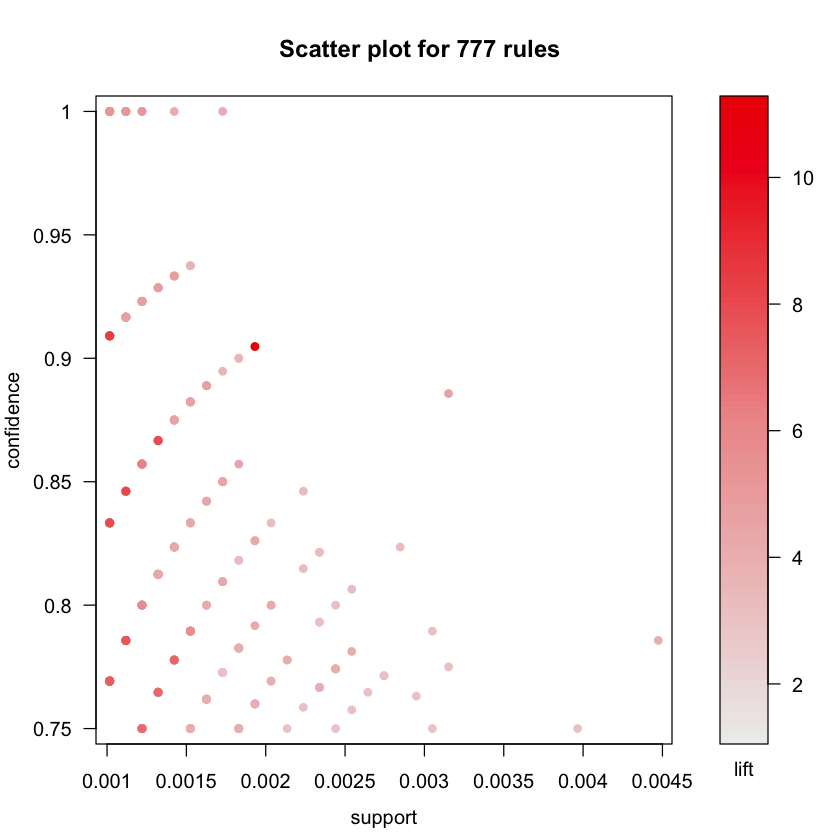

In [16]:
# PLOTS ####################################################

# Scatterplot of support x confidence (colored by lift)
plot(rules,
         jitter=0)  # To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
main	 =  Graph for 20 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

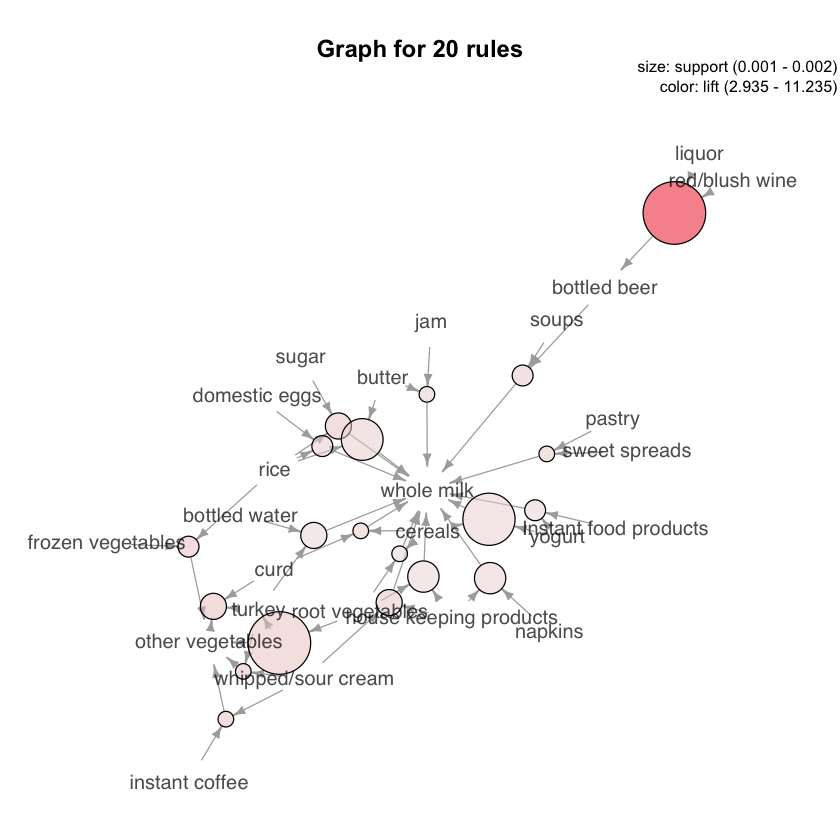

In [20]:
# Graph of top 20 rules
plot(
  rules[1:20], 
  method = "graph",
  control = list(type = "items")  
)